In [71]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F

In [72]:
dataset_name = 'subjective_belief_observers_features_labels.csv'
data = pd.read_csv(dataset_name)

In [73]:
selected_columns = [True for _ in range(data.shape[1])]
for _ in range(1, data.shape[1]-40):
    selected_columns[_] = False
data_eye = data.iloc[:, selected_columns]
data_eye_features = data_eye.iloc[:, 1:-1]
# data_eye_features

,0_eye,1_eye,2_eye,3_eye,4_eye,5_eye,6_eye,7_eye,8_eye,9_eye,...,29_eye,30_eye,31_eye,32_eye,33_eye,34_eye,35_eye,36_eye,37_eye,38_eye
0,0.177485,0.720860,0.602747,0.099854,0.009971,0.610958,0.002342,0.004523,2,5,...,0.088098,0.007761,0.572257,0.002239,0.004317,2,5,0.164328,-0.061932,0.400000
1,0.299396,0.744542,0.631517,0.064996,0.004224,0.634852,0.002457,0.004740,1,4,...,0.066759,0.004457,0.593355,0.002838,0.005447,1,6,0.283381,0.002631,0.166667
2,0.306383,0.694017,0.605194,0.049781,0.002478,0.607237,0.002491,0.004817,1,5,...,0.043292,0.001874,0.580258,0.002368,0.004573,2,4,0.112301,-0.045173,0.500000
3,0.350145,0.706052,0.595702,0.053794,0.002894,0.598125,0.002315,0.004433,1,5,...,0.046186,0.002133,0.565873,0.001954,0.003728,1,5,0.298954,0.030237,0.200000
4,0.308784,0.718104,0.623816,0.048273,0.002330,0.625680,0.002012,0.003859,2,5,...,0.049019,0.002403,0.615038,0.002077,0.003969,1,5,0.294080,0.036404,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.308682,0.682834,0.604240,0.044466,0.001977,0.605873,0.003288,0.006374,1,5,...,0.037502,0.001406,0.579315,0.003424,0.006631,1,6,0.292384,0.011888,0.166667
364,0.285953,0.668573,0.580163,0.064858,0.004207,0.583775,0.003102,0.005985,1,2,...,0.063451,0.004026,0.561761,0.003281,0.006328,1,3,0.274939,-0.006544,0.333333
365,0.318182,0.731143,0.598704,0.045000,0.002025,0.600393,0.002981,0.005781,2,8,...,0.046290,0.002143,0.576458,0.003304,0.006411,2,7,0.202604,0.017001,0.285714
366,0.313339,0.688024,0.596568,0.048984,0.002399,0.598575,0.004013,0.007769,1,3,...,0.047359,0.002243,0.567903,0.003683,0.007113,1,3,0.301378,-0.016974,0.333333


In [74]:
numeric_features = data_eye_features.dtypes[data_eye.dtypes != 'object'].index
data_eye_features[numeric_features] = data_eye_features[numeric_features].apply(lambda x: (x-x.mean()) / (x.std()))
data_eye_features[numeric_features] = data_eye_features[numeric_features].fillna(0)
# data_eye_features

,0_eye,1_eye,2_eye,3_eye,4_eye,5_eye,6_eye,7_eye,8_eye,9_eye,...,29_eye,30_eye,31_eye,32_eye,33_eye,34_eye,35_eye,36_eye,37_eye,38_eye
0,-1.688976,0.187051,0.256446,3.171071,3.543703,0.308747,0.054207,0.081902,0.956203,-0.151215,...,3.634237,4.778965,0.015332,0.101840,0.115872,1.029548,-0.128742,-0.852848,-2.358977,1.141225
1,0.301055,0.356162,0.498622,1.173140,0.893773,0.509801,0.170242,0.192372,-0.657938,-0.769516,...,1.984387,2.104989,0.202124,0.795291,0.774379,-0.654335,0.502952,0.624390,-0.224856,-1.045464
2,0.415118,-0.004623,0.277046,0.301112,0.088485,0.277439,0.203884,0.231778,-0.657938,-0.151215,...,0.169926,0.015084,0.086168,0.251071,0.265426,1.029548,-0.760435,-1.498399,-1.805023,2.078377
3,1.129478,0.081314,0.197145,0.531071,0.280118,0.200764,0.026836,0.036345,-0.657938,-0.151215,...,0.393659,0.224606,-0.041185,-0.226998,-0.227059,-0.654335,-0.128742,0.817621,0.687684,-0.733080
4,0.454314,0.167371,0.433791,0.214682,0.020299,0.432623,-0.278029,-0.256088,0.956203,-0.151215,...,0.612726,0.442889,0.394096,-0.084703,-0.086402,-0.654335,-0.128742,0.757145,0.891541,-0.733080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.452641,-0.084480,0.269014,-0.003531,-0.142523,0.265962,1.005933,1.024448,-0.657938,-0.151215,...,-0.277810,-0.363517,0.077821,1.471976,1.464302,-0.654335,0.502952,0.736093,0.081132,-1.045464
364,0.081622,-0.186314,0.066346,1.165247,0.885526,0.080019,0.818884,0.826531,-0.657938,-2.006118,...,1.728623,1.756436,-0.077595,1.306389,1.287821,-0.654335,-1.392129,0.519642,-0.528130,0.516457
365,0.607718,0.260480,0.222419,0.027059,-0.120503,0.219847,0.696986,0.722647,0.956203,1.703688,...,0.401700,0.232388,0.052532,1.333777,1.335957,1.029548,1.134645,-0.377907,0.250146,0.070193
366,0.528658,-0.047419,0.204435,0.255420,0.052176,0.204549,1.735407,1.734624,-0.657938,-1.387817,...,0.484377,0.313423,-0.023215,1.771525,1.745009,-0.654335,-1.392129,0.847700,-0.872902,0.516457


In [75]:
n_train = 22 * 16
n_test = 16
train_features = torch.tensor(data_eye_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(data_eye_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(data_eye.iloc[:n_train, -1].values, dtype=torch.long)
test_labels = torch.tensor(data_eye.iloc[n_train:, -1].values, dtype=torch.long)

In [76]:
input_neurons = 39
hidden_neurons = 100
output_neurons = 2
learning_rate = 0.003
num_epochs = 200

In [77]:
# loss = nn.CrossEntropyLoss()
# in_features = train_features.shape[1]
# def get_net():
#     net = nn.Sequential(nn.Linear(in_features, 1))
#     return net


In [78]:
net = nn.Sequential(nn.Linear(input_neurons, hidden_neurons), nn.Sigmoid(), nn.Linear(hidden_neurons, output_neurons))
loss_func = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [79]:
all_losses = []
for epoch in range(num_epochs):
    train_pred = net(train_features)
    loss = loss_func(train_pred, train_labels)
    all_losses.append(loss.item())
    if epoch % 50 == 0:
        _, predicted = torch.max(F.softmax(train_pred, 1), 1)

        total = predicted.size()
        correct = predicted.data.numpy() == train_labels.data.numpy()
        print('Epoch [%d/%d] Loss: %.4f Accuracy: %.2f %%' %(epoch+1, num_epochs, loss.item(), 100*sum(correct)/total))
    net.zero_grad()
    loss.backward()
    optimiser.step()

Epoch [1/200] Loss: 0.7589 Accuracy: 47.44 %
Epoch [51/200] Loss: 0.6504 Accuracy: 60.80 %
Epoch [101/200] Loss: 0.6080 Accuracy: 67.61 %
Epoch [151/200] Loss: 0.5136 Accuracy: 77.27 %


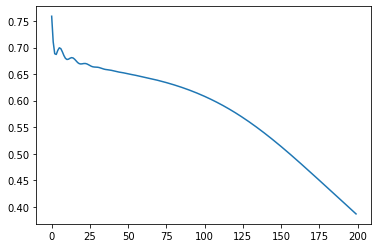

In [80]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(all_losses)
plt.show()

In [81]:
# confusion = torch.zeros(output_neurons, output_neurons)
# for i in range(train_features.size(0)):
#     actual_class = train_features.data[i]

In [82]:
Y_pred_test = net(test_features)
_, predicted_test = torch.max(F.softmax(Y_pred_test, 1), 1)
total_test = predicted_test.size(0)
correct_test = sum(predicted_test.data.numpy() == test_labels.data.numpy())
print('Test Accuracy: %.2f %%' %(100*correct_test/total_test))

Test Accuracy: 62.50 %


In [83]:
net[0].weight.data

tensor([[ 0.3599,  0.0208,  0.1775,  ..., -0.1621,  0.4996, -0.0285],
        [ 0.3664,  0.7424, -0.3986,  ..., -0.3501, -0.4370,  0.4529],
        [ 0.1316, -0.1442, -0.1360,  ..., -0.1918, -0.1468, -0.1850],
        ...,
        [ 0.0318, -0.1256, -0.0746,  ..., -0.1109, -0.0008, -0.2469],
        [-0.1661, -0.5683,  0.3928,  ..., -0.0580, -0.7502,  0.7610],
        [ 0.2300, -0.3484,  0.0225,  ...,  0.0273,  0.1726,  0.3285]])

In [84]:
net[2].weight.data.shape

torch.Size([2, 100])

In [85]:
print(*[(name, param.shape) for name, param in net.named_parameters()])

('0.weight', torch.Size([100, 39])) ('0.bias', torch.Size([100])) ('2.weight', torch.Size([2, 100])) ('2.bias', torch.Size([2]))
